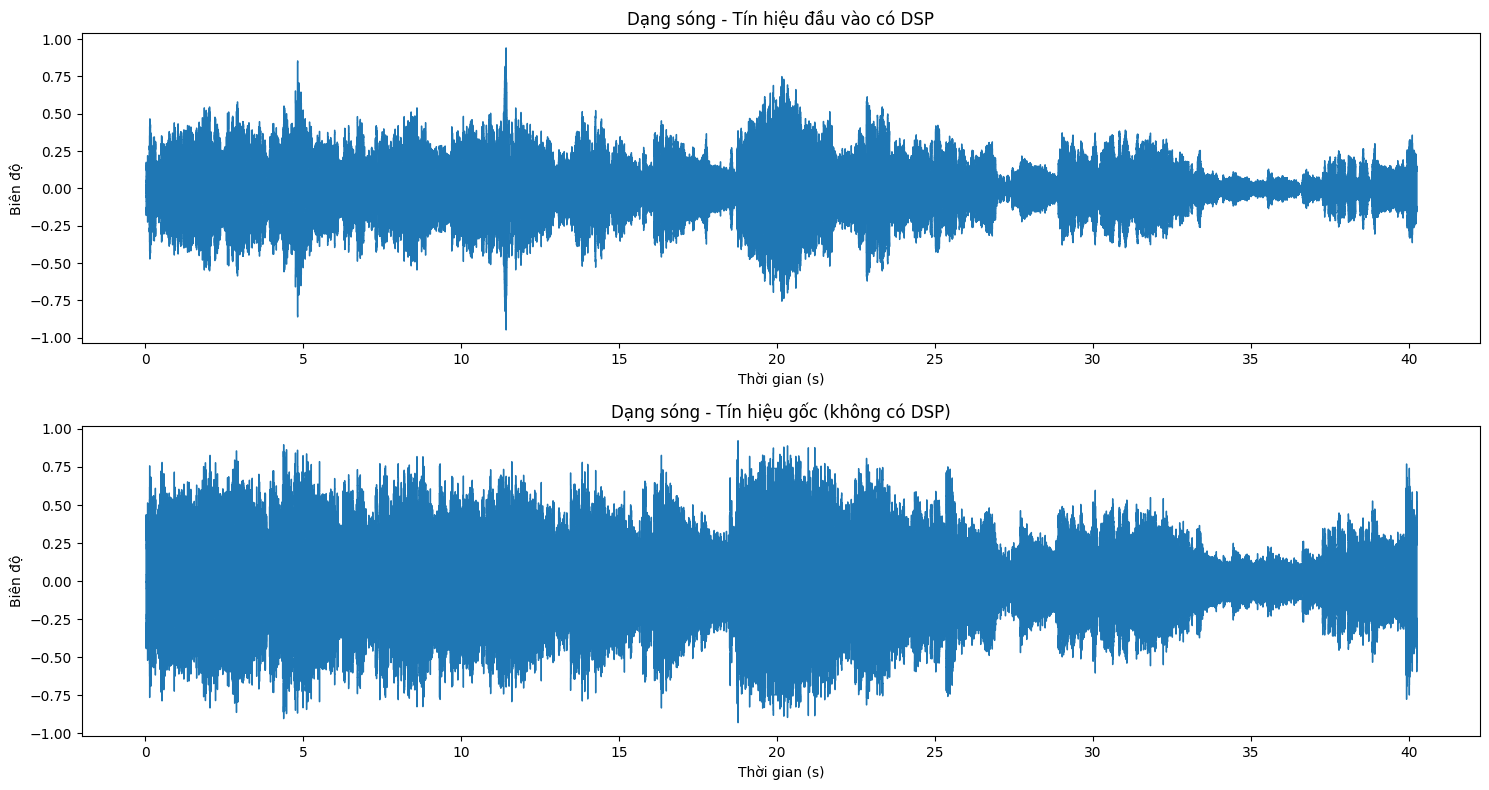

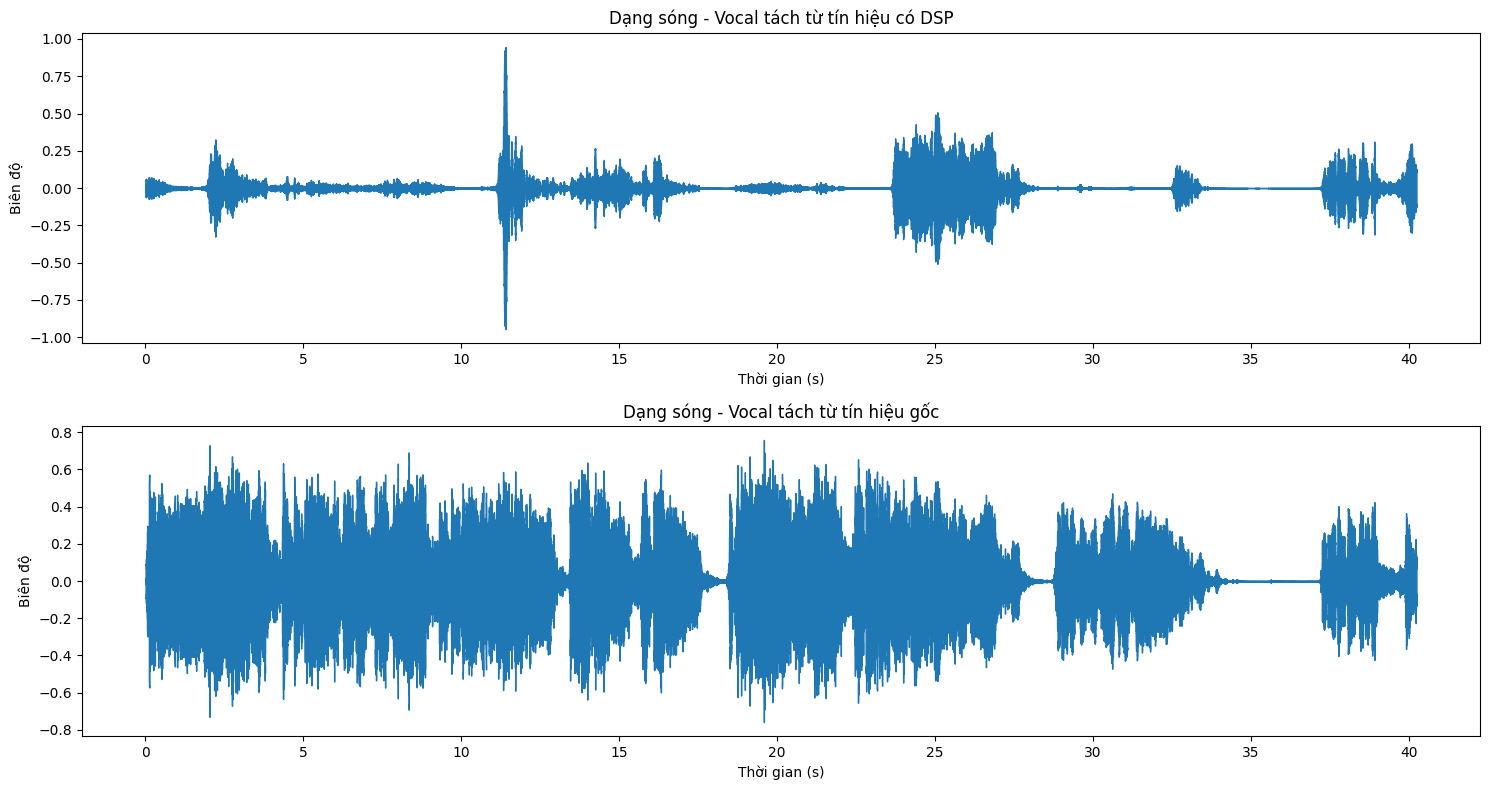

In [21]:
# Cell 1: Import thư viện và thiết lập môi trường Notebook
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import soundfile as sf
from spleeter.separator import Separator

# Cell 2: Hàm vẽ biểu đồ cho Phase 2
def plot_spleeter_results():
    """
    Vẽ biểu đồ cho Phase 2: So sánh tín hiệu đầu vào, vocal, accompaniment, và vocal từ file gốc.
    File audio và biểu đồ nằm cùng cấp với Notebook.
    """
    # File đầu vào
    input_path = '20250725_111327_05_preprocessed_for_ai.wav'  # Sau DSP
    original_path = '20250725_111327_00_original_extracted_from_video.wav'  # Gốc
    
    # Kiểm tra file đầu vào
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"File {input_path} không tồn tại")
    if not os.path.exists(original_path):
        raise FileNotFoundError(f"File {original_path} không tồn tại")
    
    # Đọc file đầu vào
    sr = 16000
    input_audio, _ = librosa.load(input_path, sr=sr, mono=True)
    
    # Chạy Spleeter cho file sau DSP nếu chưa có
    vocal_path = ('20250725_115237_02a_ai_vocals_separated.wav')
    accomp_path = ('20250725_115237_02b_ai_accompaniment_separated.wav')
    # if not (os.path.exists(vocal_path) and os.path.exists(accomp_path)):
    #     separator = Separator('spleeter:2stems-16kHz')
    #     separator.separate_to_file(input_path, '.')
    
    # Đọc file vocal và accompaniment
    vocal_audio, _ = librosa.load(vocal_path, sr=sr, mono=True)
    accomp_audio, _ = librosa.load(accomp_path, sr=sr, mono=True)
    
    # Chạy Spleeter cho file gốc nếu chưa có
     # Lấy tên gốc của file không có phần mở rộng để tạo đường dẫn thư mục
    original_stem = os.path.splitext(os.path.basename(original_path))[0]
    orig_vocal_path = os.path.join(original_stem, 'vocals.wav')
    
    if not os.path.exists(orig_vocal_path):
        print(f"Không tìm thấy file vocal gốc. Chạy Spleeter cho file: {original_path}")
        separator = Separator('spleeter:2stems-16kHz')
        # Spleeter sẽ lưu kết quả vào thư mục './<original_stem>/'
        separator.separate_to_file(original_path, '.')
        print(f"✓ Spleeter đã hoàn thành. File vocal lưu tại: {orig_vocal_path}")
    
    # Đọc file vocal từ file gốc
    orig_vocal_audio, _ = librosa.load(orig_vocal_path, sr=sr, mono=True)
    orig_vocal_input, _ = librosa.load(original_path, sr=sr, mono=True)
    
    # Tính STFT
    n_fft = 2048
    hop_length = 512
    input_stft = librosa.stft(input_audio, n_fft=n_fft, hop_length=hop_length, window='hann')
    vocal_stft = librosa.stft(vocal_audio, n_fft=n_fft, hop_length=hop_length, window='hann')
    accomp_stft = librosa.stft(accomp_audio, n_fft=n_fft, hop_length=hop_length, window='hann')
    orig_vocal_stft = librosa.stft(orig_vocal_input, n_fft=n_fft, hop_length=hop_length, window='hann')
    
    
    # 2. Dạng sóng so sánh (Tín hiệu đầu vào, Vocal, Accompaniment)
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(input_audio, sr=sr)
    plt.title('Dạng sóng - Tín hiệu đầu vào có DSP')
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Biên độ')
    
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(orig_vocal_input, sr=sr)
    plt.title('Dạng sóng - Tín hiệu gốc (không có DSP)')
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Biên độ')
    
    plt.tight_layout()
    plt.savefig('input_signals_comparison.png')
    plt.show()

    # Biểu đồ 2: So sánh vocal tách ra (từ DSP vs từ gốc)
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(vocal_audio, sr=sr)
    plt.title('Dạng sóng - Vocal tách từ tín hiệu có DSP')
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Biên độ')

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(orig_vocal_audio, sr=sr)
    plt.title('Dạng sóng - Vocal tách từ tín hiệu gốc')
    plt.xlabel('Thời gian (s)')
    plt.ylabel('Biên độ')
    
    plt.tight_layout()
    plt.savefig('vocals_comparison.png')
    plt.show()
    

# Cell 3: Thực thi
plot_spleeter_results()